In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from glob import glob
from tqdm import tqdm
import numba as nb

In [4]:
df = pd.read_csv("../data/metadata.csv")
df

,sample_id,split,instrument_type,features_path,features_md5_hash
0,S0000,train,commercial,train_features/S0000.csv,017b9a71a702e81a828e6242aa15f049
1,S0001,train,commercial,train_features/S0001.csv,0d09840214054d254bd49436c6a6f315
2,S0002,train,commercial,train_features/S0002.csv,3f58b3c9b001bfed6ed4e4f757083e09
3,S0003,train,commercial,train_features/S0003.csv,e9a12f96114a2fda60b36f4c0f513fb1
4,S0004,train,commercial,train_features/S0004.csv,b67603d3931897bfa796ac42cc16de78
...,...,...,...,...,...
1565,S1565,test,sam_testbed,test_features/S1565.csv,3146a38af69bb12aff54b9cd1e2c49e8
1566,S1566,test,sam_testbed,test_features/S1566.csv,239d0687ec42966d80394c7b206c23df
1567,S1567,test,sam_testbed,test_features/S1567.csv,040585537a39523a582af874ff2f3b3d
1568,S1568,test,sam_testbed,test_features/S1568.csv,6211107e4f0eedcdc5750cd27f57d4fa


In [9]:
df = pd.read_csv("../data/supplemental_metadata.csv")
df

,sample_id,split,instrument_type,carrier_gas,different_pressure,features_path,features_md5_hash
0,X0000,supplemental,commercial,he,0,supplemental_features/X0000.csv,415d9be2aaa9151551ec2ce94aac3236
1,X0001,supplemental,commercial,he,0,supplemental_features/X0001.csv,4d0fb1f6f9b970c2a21280b64e146148
2,X0002,supplemental,commercial,he,0,supplemental_features/X0002.csv,4d8b44276eea5291de30f6764f67a5d3
3,X0003,supplemental,commercial,he,0,supplemental_features/X0003.csv,6c21bb6c254f38734ec7d9afd5146099
4,X0004,supplemental,commercial,he,0,supplemental_features/X0004.csv,b8c549be189f6cb14f6afa60d9b9b105
...,...,...,...,...,...,...,...
383,X0383,supplemental,sam_testbed,he,0,supplemental_features/X0383.csv,7c1e83ca018ced016038c5af3874329e
384,X0384,supplemental,sam_testbed,he,0,supplemental_features/X0384.csv,bbe41531e4525a3f7e0c4ec0f810fa87
385,X0385,supplemental,sam_testbed,he,0,supplemental_features/X0385.csv,dffed7b0955bcc419644ac2d90597723
386,X0386,supplemental,sam_testbed,he,0,supplemental_features/X0386.csv,a4db0c66658c5d6c464492d860abb9d0


In [12]:
df.groupby(['carrier_gas', 'different_pressure']).count()

sample_id  split  instrument_type  \
carrier_gas different_pressure                                      
he          0                         261    261              261   
            1                          10     10               10   
n2          1                          19     19               19   
o2          0                           1      1                1   
            1                          97     97               97   

                                features_path  features_md5_hash  
carrier_gas different_pressure                                    
he          0                             261                261  
            1                              10                 10  
n2          1                              19                 19  
o2          0                               1                  1  
            1                              97                 97

In [3]:
df = pd.read_csv("../data/submission_format.csv")
df

,sample_id,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,sulfide
0,S0766,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,S0767,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,S0768,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,S0769,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,S0770,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...
799,S1565,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
800,S1566,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
801,S1567,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
802,S1568,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [4]:
df = pd.read_csv("../data/supplemental_metadata.csv")
df

,sample_id,split,instrument_type,carrier_gas,different_pressure,features_path,features_md5_hash
0,X0000,supplemental,commercial,he,0,supplemental_features/X0000.csv,415d9be2aaa9151551ec2ce94aac3236
1,X0001,supplemental,commercial,he,0,supplemental_features/X0001.csv,4d0fb1f6f9b970c2a21280b64e146148
2,X0002,supplemental,commercial,he,0,supplemental_features/X0002.csv,4d8b44276eea5291de30f6764f67a5d3
3,X0003,supplemental,commercial,he,0,supplemental_features/X0003.csv,6c21bb6c254f38734ec7d9afd5146099
4,X0004,supplemental,commercial,he,0,supplemental_features/X0004.csv,b8c549be189f6cb14f6afa60d9b9b105
...,...,...,...,...,...,...,...
383,X0383,supplemental,sam_testbed,he,0,supplemental_features/X0383.csv,7c1e83ca018ced016038c5af3874329e
384,X0384,supplemental,sam_testbed,he,0,supplemental_features/X0384.csv,bbe41531e4525a3f7e0c4ec0f810fa87
385,X0385,supplemental,sam_testbed,he,0,supplemental_features/X0385.csv,dffed7b0955bcc419644ac2d90597723
386,X0386,supplemental,sam_testbed,he,0,supplemental_features/X0386.csv,a4db0c66658c5d6c464492d860abb9d0


In [5]:
df = pd.read_csv("../data/train_labels.csv")
df

,sample_id,basalt,carbonate,chloride,iron_oxide,oxalate,oxychlorine,phyllosilicate,silicate,sulfate,sulfide
0,S0000,0,0,0,0,0,0,0,0,1,0
1,S0001,0,1,0,0,0,0,0,0,0,0
2,S0002,0,0,0,0,0,1,0,0,0,0
3,S0003,0,1,0,1,0,0,0,0,1,0
4,S0004,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
761,S0761,0,0,0,0,0,0,0,0,0,0
762,S0762,0,0,0,0,0,0,1,0,0,0
763,S0763,0,0,0,0,0,0,0,0,0,0
764,S0764,0,0,0,0,0,0,0,0,0,0


In [6]:
df.sum()

sample_id         S0000S0001S0002S0003S0004S0005S0006S0007S0008S...
basalt                                                           91
carbonate                                                        98
chloride                                                         93
iron_oxide                                                      169
oxalate                                                          30
oxychlorine                                                     180
phyllosilicate                                                  243
silicate                                                        104
sulfate                                                         149
sulfide                                                          36
dtype: object

In [7]:
@nb.jit(nopython=True)
def array_to_square_array(x, col):
    col_values = np.unique(x[:,col])
    new_array = [[[0.] for j in range(x.shape[1])] for i in col_values]
    col_counts = [0 for i in col_values]
    max_count = 0
    
    for i in range(x.shape[0]):
        row = x[i]
        
        col_index = np.argwhere(col_values==row[col]).item()
        col_counts[col_index] += 1
        
        for n in range(max_count - col_counts[col_index]):
            for j in range(len(row)):
                new_array[col_index][j].append(np.nan)
            col_counts[col_index] += 1
        
        for j in range(len(row)):
            new_array[col_index][j].append(row[j])

        max_count = max(max_count, col_counts[col_index])
    
    for col_index in range(len(col_values)):
        for n in range(max_count - col_counts[col_index]):
            for j in range(len(row)):
                new_array[col_index][j].append(np.nan)
    return np.array(new_array)[...,1:], col_values

# array_to_square_array(df[:10].values, 2)[0].shape

In [8]:
def reshape_df_to_ds(df):
    ds_sample_parts = []
    
    x, mz = array_to_square_array(df.values, 2)
    
    ts = np.nanmean(x[:,0,:], axis=0)
    temps = np.nanmean(x[:,1,:], axis=0)
    abunds = x[:,3,:]
    index = np.arange(x.shape[-1])
    
    ds_new = xr.DataArray(abunds, dims=['mz', 'index'], coords=[mz, index], name='abundance').to_dataset()

    ds_new['time'] = xr.DataArray(ts, dims=['index'], coords=[ds_new.index.values], name='time')
    ds_new['temp'] = xr.DataArray(temps, dims=['index'], coords=[ds_new.index.values], name='temp')
    return ds_new

In [9]:
all_ds_raw = []

files = sorted(
    glob("../data/train_features/*.csv") +
    glob("../data/val_features/*.csv") +
    glob("../data/test_features/*.csv"),
    key = lambda x: x.split('/')[-1]
)

for f in tqdm(files):
    # topu
    df = pd.read_csv(f)
    sample_id = f.split('/')[-1].replace('.csv', '')
    
    ds_new = reshape_df_to_ds(df)
    ds_new = ds_new.assign_coords({"sample_id": [sample_id]})
    
    all_ds_raw.append(ds_new)

100%|███████████████████████████████████████████████████████████████████████████████| 1570/1570 [01:02<00:00, 25.25it/s]


In [10]:
def fix_offset_abundance(ds):
    ds['abundance'] = ds.abundance - ds.abundance.min(dim='mz')
    return ds

def min_max_scale_sample(ds):
    ds['abundance'] = ds.abundance/ds.abundance.max(dim=('mz', 'index'))
    return ds

def scale_by_helium_sample(ds):
    ds['abundance'] = ds.abundance/ds.abundance.sel(mz=4).max(dim=('index'))
    return ds

In [12]:
@nb.jit(nopython=True)
def round_discard(x, fill=-1, tol=.2):
    l = [0]
    for v in x:
        if ((v<int(v)-v)>tol) and (int(v+tol)!=(int(v)+1)):
            l.append(int(fill))
        else:
            l.append(int(v+tol))
    return np.array(l)[1:]

def drop_frac_mz_with_rounding(ds, fill=-1, tol=.2):
    g = xr.DataArray(round_discard(ds.mz.values, fill=fill, tol=tol), dims=['mz'], coords=[ds.mz], name='g')
    ds = ds.groupby(g).sum(dim='mz').rename({'g':'mz'})
    ds['temp'] = ds.temp.isel(mz=0).drop('mz')
    ds['time'] = ds.time.isel(mz=0).drop('mz')
    return ds

def drop_helium(ds):
    return ds.sel(mz=[x for x in ds.mz if x!=4])

def drop_heavy(ds):
    return ds.sel(mz=slice(None, 100))

round_discard(np.random.normal(0,1,100))


array([ 1, -1,  0,  0, -1,  0, -1,  1, -1,  2, -1,  1, -1, -1, -1,  0,  1,
       -1, -1, -1, -1,  0,  0, -1,  1,  1, -1, -1, -1, -1,  0,  1, -1,  1,
        1,  1, -1,  0,  1,  0,  0, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0,
       -1, -1, -1,  0, -1,  1, -1,  1,  0, -1, -1,  1,  1, -1,  1,  2, -1,
        1,  0,  1, -1,  1, -1, -1,  0,  1,  1, -1,  0, -1, -1, -1,  0,  1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1,  1, -1, -1,  1, -1, -1])

In [32]:
def preprocess(ds):
    ds = drop_frac_mz_with_rounding(ds)
    ds = drop_helium(ds)
    ds = drop_heavy(ds)
    ds = fix_offset_abundance(ds)
    ds = min_max_scale_sample(ds)
    return ds

def preprocess2(ds):
    
    ds = drop_frac_mz_with_rounding(ds)
    ds = drop_heavy(ds)
    ds = fix_offset_abundance(ds)
    ds = scale_by_helium_sample(ds)
    ds = drop_helium(ds)
    return ds

In [33]:
all_ds = [preprocess(ds) for ds in tqdm(all_ds_raw)]


 48%|██████████████████████████████████████▍                                         | 754/1570 [43:58<47:35,  3.50s/it]

100%|███████████████████████████████████████████████████████████████████████████████| 1570/1570 [03:01<00:00,  8.63it/s]


In [34]:
all_ds[0]

<xarray.Dataset>
Dimensions:    (index: 193, mz: 100, sample_id: 1)
Coordinates:
  * index      (index) int64 0 1 2 3 4 5 6 7 ... 185 186 187 188 189 190 191 192
  * sample_id  (sample_id) <U5 'S0000'
  * mz         (mz) int64 0 1 2 3 5 6 7 8 9 10 ... 92 93 94 95 96 97 98 99 100
Data variables:
    abundance  (mz, index) float64 0.001541 0.001549 0.001527 ... 0.0 0.0 0.0
    time       (index) float64 0.0 10.25 20.52 ... 1.951e+03 1.961e+03 1.972e+03
    temp       (index) float64 35.29 35.42 35.68 36.33 ... 366.9 368.6 370.4

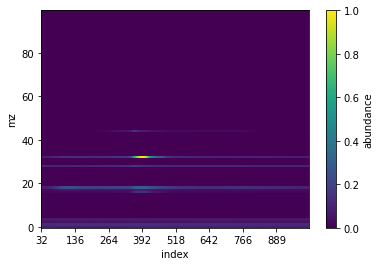

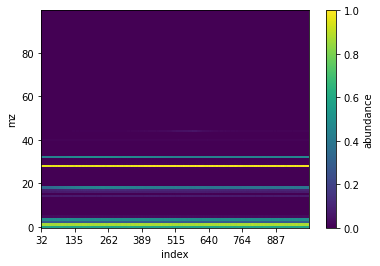

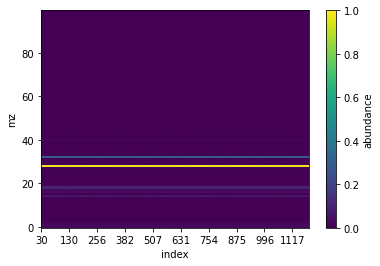

In [35]:
for i in range(50, 80, 10):
    all_ds[i].abundance.plot()
    ticks = all_ds[i].index[::40].values
    labels = np.round(all_ds[i].temp)[::40].values.astype(int)
    plt.xticks(ticks=ticks, labels=labels)
    plt.show()

In [36]:
def append_labels_and_meta(ds):
    labels = (
        pd.read_csv("../data/train_labels.csv")
        .set_index('sample_id', drop=True)
        .to_xarray()
        .to_array(dim='species', name='labels')
    ).transpose()

    metadata = (
        pd.read_csv("../data/metadata.csv")
        .set_index('sample_id', drop=True)
        .to_xarray()
        .drop(['features_path', 'features_md5_hash'])
    )

    ds = ds.merge(labels).merge(metadata)
    return ds

## Model using sum along time

In [29]:
def sum_along_index(all_ds):
    all_ds_max = [ds.max(dim='index') for ds in all_ds]
    ds_mx_regrid = xr.concat(
        [ds.max(dim='index') for ds in all_ds],
        dim='sample_id'
    )
    ds_mx_regrid['features'] = (ds_mx_regrid.abundance/ds_mx_regrid.abundance.max(dim='mz')).clip(0,1)
    ds_mx_regrid['features'] = ds_mx_regrid.features.fillna(-.1)
    ds_mx_regrid = append_labels_and_meta(ds_mx_regrid)
    return ds_mx_regrid

In [30]:
ds_mx = sum_along_index(all_ds)

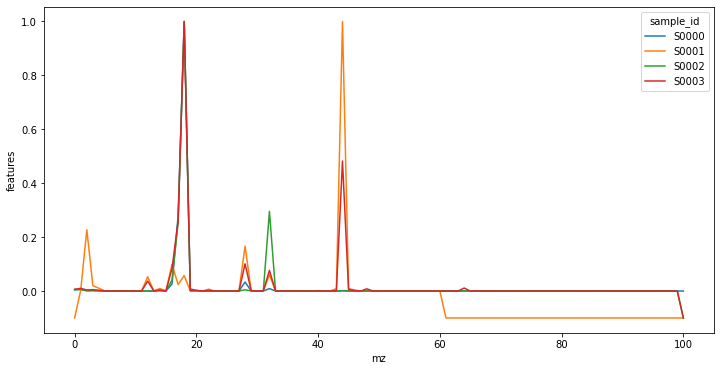

In [32]:
plt.figure(figsize=(12,6))
ds_mx.features.isel(sample_id=slice(0,4)).plot(hue='sample_id');

In [268]:
ds_train = ds_mx.where(ds_mx_regrid.split=='train', drop=True)

In [272]:
X = np.concatenate([
    ds_train.features.values, 
    (ds_train.instrument_type.values=='commercial').astype(float)[:, None]
], axis=1)

y = ds_train.labels.values.T

X.shape, y.shape

In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [275]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

clf = MultiOutputClassifier(XGBClassifier())
clf.fit(X_train, y_train)

In [300]:
from sklearn.metrics import log_loss
y_pred = np.array(clf.predict_proba(X_test))[...,1].T
y_pred.shape

(77, 10)

In [301]:
log_loss(y_test.flatten(), y_pred.flatten())

0.19677679502915865

In [298]:
y_pred = np.array(clf.predict_proba(X_train))[...,1].T
log_loss(y_train.flatten(), y_pred.flatten())

0.006095439349185737

## Model using bin along temp

In [37]:
def bin_by_temp(ds, bins):
    return ds.groupby_bins('temp', bins).mean(dim='index')

In [38]:
def bin_along_temp(all_ds, bins):
    all_ds = [bin_by_temp(ds, bins) for ds in tqdm(all_ds)]
    ds_regrid = xr.concat(all_ds, dim='sample_id')
    ds_regrid['features'] = ds_regrid.abundance#/ds_mx_regrid.abundance.max(dim='mz')).clip(0,1)
    ds_regrid['features'] = ds_regrid.features.fillna(-.1)
    ds_regrid = append_labels_and_meta(ds_regrid)
    return ds_regrid

In [241]:
bins = np.arange(0, 1550, 50)
ds_bin = bin_along_temp(all_ds, bins=bins)

100%|███████████████████████████████████████████████████████████████████████████████| 1570/1570 [00:43<00:00, 35.79it/s]


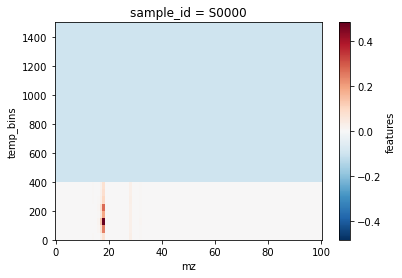

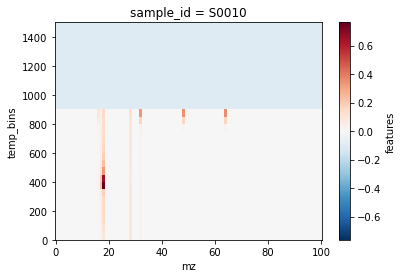

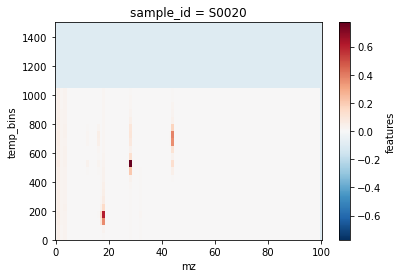

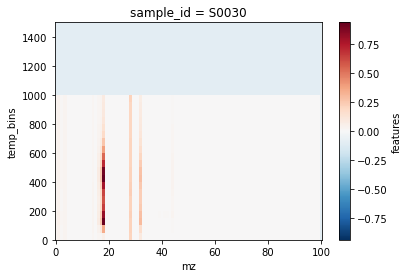

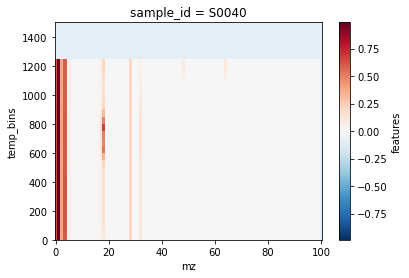

In [242]:
for i in range(0, 50, 10):
    ds_bin.features.isel(sample_id=i).plot()
    plt.show()

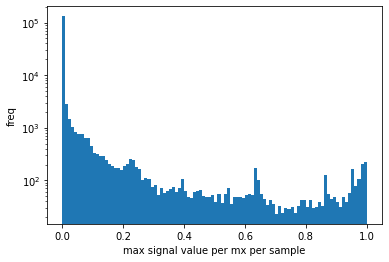

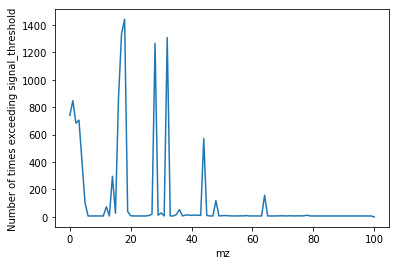

Number of mz with signal_threshold=0.05 and occurence_threshold=10 is : 30


In [244]:
(ds_bin.abundance.max(dim=('temp_bins'))).plot.hist(bins=100);
plt.yscale('log')
plt.xlabel('max signal value per mx per sample')
plt.ylabel('freq')
plt.show()

signal_threshold = 0.05
occurence_threshold = 10

x = (ds_bin.abundance.max(dim=('temp_bins'))>signal_threshold).sum(dim='sample_id')
x.plot()
plt.xlabel('mz')
plt.ylabel(f'Number of times exceeding signal_threshold')
plt.show()
print(f"Number of mz with signal_threshold={signal_threshold} and occurence_threshold={occurence_threshold} is : {(x>occurence_threshold).sum().item()}")

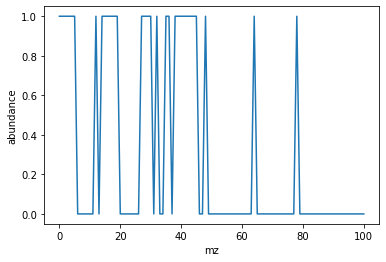

In [245]:
## get rid of mz which don't have strong signal many times
mz_mask = (ds_bin.abundance.max(dim=('temp_bins'))>signal_threshold).sum(dim='sample_id') > occurence_threshold
mz_mask.plot()

In [246]:
ds_bin_filt = ds_bin.sel(mz=mz_mask)
ds_bin_filt

<xarray.Dataset>
Dimensions:          (sample_id: 1570, mz: 30, temp_bins: 30, species: 10)
Coordinates:
  * sample_id        (sample_id) object 'S0000' 'S0001' ... 'S1568' 'S1569'
  * mz               (mz) int64 0 1 2 3 5 12 14 15 ... 41 42 43 44 45 48 64 78
  * temp_bins        (temp_bins) object (0, 50] (50, 100] ... (1450, 1500]
  * species          (species) <U14 'basalt' 'carbonate' ... 'sulfate' 'sulfide'
Data variables:
    abundance        (sample_id, temp_bins, mz) float64 0.001538 ... nan
    time             (sample_id, temp_bins) float64 61.56 266.8 ... nan nan
    temp             (sample_id, temp_bins) float64 40.9 74.9 122.9 ... nan nan
    features         (sample_id, temp_bins, mz) float64 0.001538 ... -0.1
    labels           (sample_id, species) float64 0.0 0.0 0.0 ... nan nan nan
    split            (sample_id) object 'train' 'train' ... 'test' 'test'
    instrument_type  (sample_id) object 'commercial' ... 'sam_testbed'

In [247]:
ds_train = ds_bin_filt.where(ds_bin_filt.split=='train', drop=True)

In [248]:
X = np.concatenate([
    ds_train.features.stack(dict(z=("temp_bins","mz"))).values, 
    (ds_train.instrument_type.values=='commercial').astype(float)[:, None]
], axis=1)

y = ds_train.labels.values

X.shape, y.shape

((766, 901), (766, 10))

In [249]:
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, log_loss

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [251]:
def log_loss_multi(y_true, y_pred):
    return log_loss(np.array(y_true).flatten(), np.array(y_pred)[...,1].T.flatten())

scorer = make_scorer(log_loss_multi, greater_is_better=False, needs_proba=True)

In [252]:
from sklearn.multioutput import MultiOutputClassifier

clf = MultiOutputClassifier(
    XGBClassifier(
        n_estimators=100, 
        n_jobs=10,
        max_depth=3,
        eval_metric='logloss',
        gpu_id=0,
        subsample=1,
        #reg_alpha=1,
        #reg_lambda=1,
        learning_rate=.1,
        use_label_encoder=False,
    )
)


clf.fit(X_train, y_train);

In [253]:
scorer(clf, X_train, y_train), scorer(clf, X_test, y_test)

(-0.03553210241829146, -0.20638739630461264)

In [254]:
# cross val fitting
scores = cross_val_score(clf, X, y, cv=10, scoring=scorer)
scores

array([-0.16321143, -0.22383821, -0.20471401, -0.18831473, -0.15792473,
       -0.14300015, -0.1764128 , -0.1881816 , -0.13947653, -0.18422534])

In [266]:
params_master = {
    'min_child_weight': [.05,.1,.5,1,2,4,8],
    'gamma': [0.01, 0.05, 0.1, 0.5, 1, 1.5, 2],
    #'subsample': [1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, .01, .1],
    'max_depth' : [3,6,8,12,18],
    'learning_rate' : [.1, .05, .2],
    'n_estimators' : [50, 80, 120, 160, 200, 300]
}

In [230]:
%%time
from sklearn.model_selection import RandomizedSearchCV

params = {f"estimator__{k}":vparams_master.items()}

scorer = make_scorer(log_loss_multi, greater_is_better=False, needs_proba=True)

random_search = RandomizedSearchCV(
    clf, 
    param_distributions=params, 
    n_iter=100, 
    scoring=scorer,
    n_jobs=5, 
    cv=10,
    verbose=0, 
    random_state=1001
)

random_search.fit(X, y);

CPU times: user 1min 40s, sys: 1.04 s, total: 1min 41s
Wall time: 1h 55min 46s


RandomizedSearchCV(cv=10,
                   estimator=MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                                           booster=None,
                                                                           colsample_bylevel=None,
                                                                           colsample_bynode=None,
                                                                           colsample_bytree=None,
                                                                           enable_categorical=False,
                                                                           eval_metric='logloss',
                                                                           gamma=None,
                                                                           gpu_id=0,
                                                                           importance_type=None,
                              

In [237]:
def mean_and_uncert(random_search):
    i = np.argwhere(random_search.cv_results_["mean_test_score"]==random_search.best_score_).item()
    m = random_search.cv_results_["mean_test_score"][i]
    s = random_search.cv_results_["std_test_score"][i]
    return m,s

def compile_best_score(random_search):
    m,s = mean_and_uncert(random_search)
    return string_uncert(m,s)

def string_uncert(m,s):
    return f"{m:.3f} +- {s:.3f}"

In [238]:
compile_best_score(random_search)

'-0.181 +- 0.026'

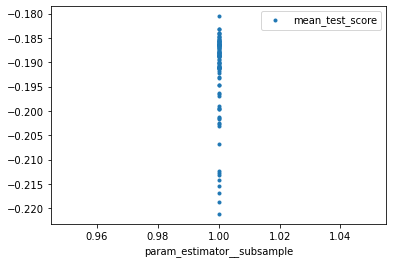

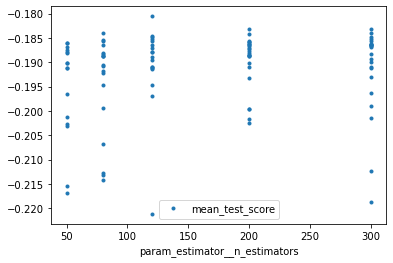

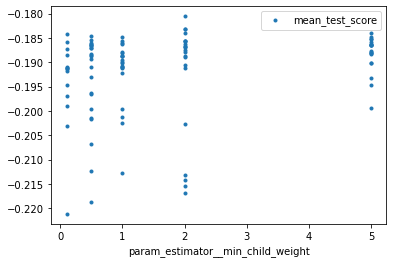

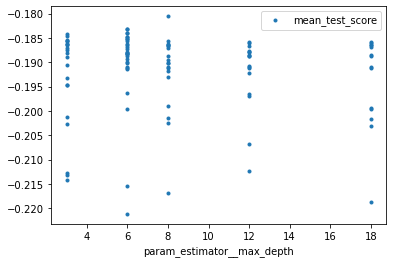

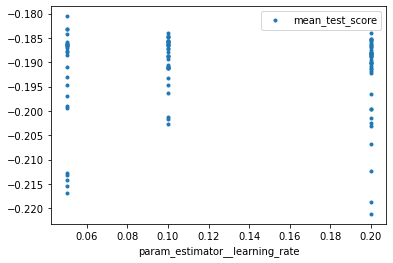

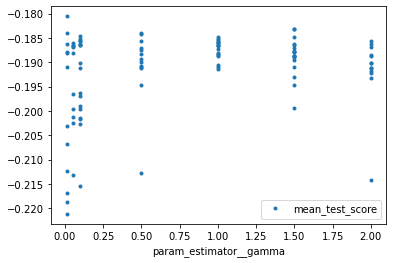

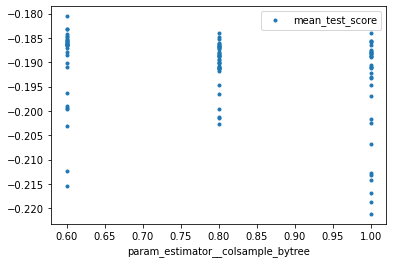

In [233]:
cv = pd.DataFrame(random_search.cv_results_).sort_values('mean_test_score')
for c in [c for c in cv.columns if 'param_' in c]:
    cv.plot(x=c, y='mean_test_score', marker='.', linestyle='')

In [267]:
%%time
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

params = params_master

clf = XGBClassifier(
        n_estimators=100, 
        n_jobs=10,
        max_depth=12,
        eval_metric='logloss',
        gpu_id=0,
        #reg_alpha=1,
        #reg_lambda=1,
        learning_rate=.05,
        use_label_encoder=False,
)

scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Check log loss score for baseline dummy model
def multi_random_search(clf, X, y, params, labels=None):

    # Generate a score for each label class
    random_search_individual = {}
    for col in tqdm(range(y.shape[1])):

        y_col = y[:, col]  # take one label at a time
        random_search_individual[col] = RandomizedSearchCV(
            clf, 
            param_distributions=params, 
            n_iter=100, 
            scoring=scorer,
            n_jobs=5, 
            cv=skf,
            verbose=0, 
            random_state=1001
        )

        random_search_individual[col].fit(X, y_col)
        
    if labels is not None:
        random_search_individual = {l:v for (k,v), l in zip(random_search_individual.items(),labels)}
    
    return random_search_individual

random_search_individual = multi_random_search(clf, X, y, params, labels=ds_train.species.values)

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [2:00:46<00:00, 724.65s/it]

CPU times: user 1min 56s, sys: 2.56 s, total: 1min 58s
Wall time: 2h 46s


In [270]:
{k:compile_best_score(v) for k,v in random_search_individual.items()}

{'basalt': '-0.166 +- 0.073',
 'carbonate': '-0.133 +- 0.079',
 'chloride': '-0.201 +- 0.044',
 'iron_oxide': '-0.230 +- 0.093',
 'oxalate': '-0.038 +- 0.049',
 'oxychlorine': '-0.194 +- 0.055',
 'phyllosilicate': '-0.244 +- 0.045',
 'silicate': '-0.195 +- 0.042',
 'sulfate': '-0.229 +- 0.041',
 'sulfide': '-0.055 +- 0.027'}

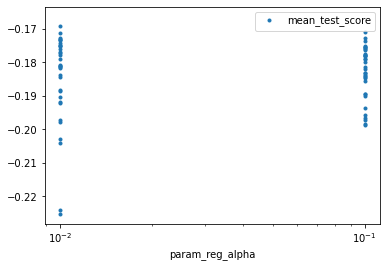

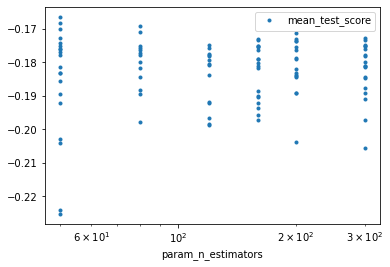

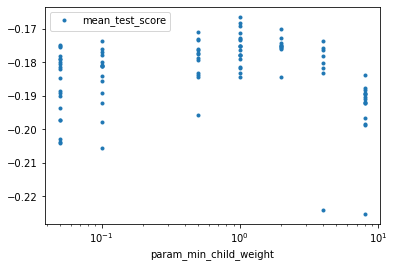

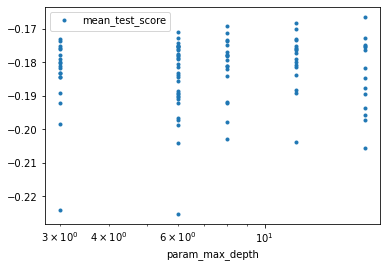

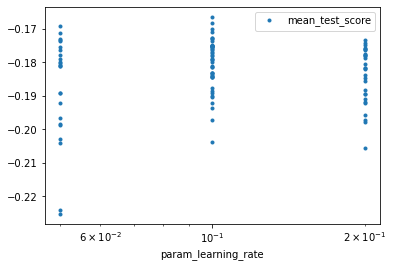

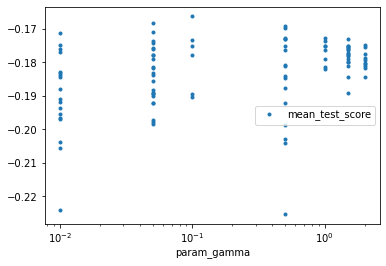

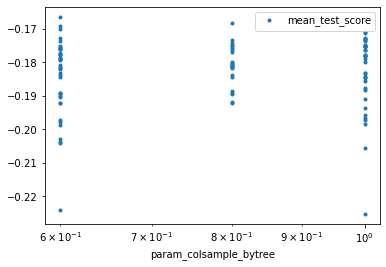

In [271]:
cv = pd.DataFrame(random_search_individual['basalt'].cv_results_).sort_values('mean_test_score')
for c in [c for c in cv.columns if 'param_' in c]:
    cv.plot(x=c, y='mean_test_score', marker='.', linestyle='')
    plt.xscale('log')

In [272]:
m,s = np.array([mean_and_uncert(v) for k,v in random_search_individual.items()]).T
m = m.mean()
s = ((s**2).sum())**.5/len(s)
string_uncert(m,s)

'-0.169 +- 0.018'

Scores from fitting different params to each sepcies

With bin width 100
- `signal_theshold` 0.05, `occurence_threshold` 10 gave 0.176 +- 0.02
- `signal_theshold` 0.01, `occurence_threshold` 5 gave 0.176 +- 0.02 # but worse on same params for each species version

With bin width 50
- `signal_theshold` 0.05, `occurence_threshold` 10 gave 0.169 +- 0.018

In [274]:
ds_train.features


<xarray.DataArray 'features' (sample_id: 766, temp_bins: 30, mz: 30)>
array([[[ 1.53827450e-03,  1.46476610e-03,  5.67846934e-04, ...,
          6.21037900e-06,  5.86221834e-06,  1.71634554e-06],
        [ 2.21627442e-03,  2.05832281e-03,  6.42369383e-04, ...,
          6.69633672e-06,  6.57885793e-06,  2.17883481e-06],
        [ 3.30786858e-03,  3.03302646e-03,  7.82036122e-04, ...,
          8.12980510e-06,  7.74062388e-06,  2.41531463e-06],
        ...,
        [-1.00000000e-01, -1.00000000e-01, -1.00000000e-01, ...,
         -1.00000000e-01, -1.00000000e-01, -1.00000000e-01],
        [-1.00000000e-01, -1.00000000e-01, -1.00000000e-01, ...,
         -1.00000000e-01, -1.00000000e-01, -1.00000000e-01],
        [-1.00000000e-01, -1.00000000e-01, -1.00000000e-01, ...,
         -1.00000000e-01, -1.00000000e-01, -1.00000000e-01]],

       [[-1.00000000e-01,  2.91030930e-03,  1.77889750e-01, ...,
          8.87710405e-06, -1.00000000e-01, -1.00000000e-01],
        [-1.00000000e-01,  2.87721276e-03,  1.80098902e-01, ...,
          7.88064728e-06, -1.00000000e-01, -1.00000000e-01],
        [-1.00000000e-01,  2.89420678e-03,  1.79706562e-01, ...,
          8.02246473e-06, -1.00000000e-01, -1.00000000e-01],
...
        [-1.00000000e-01, -1.00000000e-01, -1.00000000e-01, ...,
         -1.00000000e-01, -1.00000000e-01, -1.00000000e-01],
        [-1.00000000e-01, -1.00000000e-01, -1.00000000e-01, ...,
         -1.00000000e-01, -1.00000000e-01, -1.00000000e-01],
        [-1.00000000e-01, -1.00000000e-01, -1.00000000e-01, ...,
         -1.00000000e-01, -1.00000000e-01, -1.00000000e-01]],

       [[ 1.92308580e-07, -1.00000000e-01, -1.00000000e-01, ...,
          9.77318415e-04,  1.92693426e-03,  5.36947794e-04],
        [ 0.00000000e+00, -1.00000000e-01, -1.00000000e-01, ...,
          8.59274772e-04,  1.62917994e-03,  4.33421310e-04],
        [ 0.00000000e+00, -1.00000000e-01, -1.00000000e-01, ...,
          8.29292622e-04,  1.64786809e-03,  3.29167971e-04],
        ...,
        [-1.00000000e-01, -1.00000000e-01, -1.00000000e-01, ...,
         -1.00000000e-01, -1.00000000e-01, -1.00000000e-01],
        [-1.00000000e-01, -1.00000000e-01, -1.00000000e-01, ...,
         -1.00000000e-01, -1.00000000e-01, -1.00000000e-01],
        [-1.00000000e-01, -1.00000000e-01, -1.00000000e-01, ...,
         -1.00000000e-01, -1.00000000e-01, -1.00000000e-01]]])
Coordinates:
  * sample_id  (sample_id) object 'S0000' 'S0001' 'S0002' ... 'S0764' 'S0765'
  * mz         (mz) int64 0 1 2 3 5 12 14 15 16 ... 40 41 42 43 44 45 48 64 78
  * temp_bins  (temp_bins) object (0, 50] (50, 100] ... (1450, 1500]

In [275]:
clf

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='logloss', gamma=None,
              gpu_id=0, importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_delta_step=None, max_depth=12,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=10, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, use_label_encoder=False,
              validate_parameters=None, verbosity=None)